# **Project 1 - Salary Prediction**
## **Contents**
* [Introduction](#Introduction)
  * [Context](#Context)
  * [Python Libraries](#Python-Libraries)
  * [Data Source](#Data-Source)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Data Importation](#Data-Importation)
  * [Data Conversion](#Data-Conversion)
  * [Data Cleaning](#Data-Cleaning)
  * [Numerical Variable Exploration](#Numerical-Variable-Exploration)
  * [Categorical Variable Exploration](#Categorical-Variable-Exploration)
  * [Summary](#Summary)
* [Feature Engineering](#Feature-Engineering)
* [Data Preprocessing](#Data-Preprocessing)
* [Machine Learning Model Development](#Machine-Learning-Model-Development)
* [Model Evaluation](#Model-Evaluation)
* [Machine Learning Pipelines and Model Deployment](#Machine-Learning-Pipelines-and-Model-Deployment)
* [Recommendation](#Recommendation)
* [Conclusion](#Conclusion)

## **Introduction**
### **Context**
The purpose of this project is to predict the salaries of data professionals from a given dataset. The approach taken in this project is to analyse the dataset and prepare it for the implementation of several machine learning models in order to predict the response variable (i.e. the salary of a data professional) from one or several carefully chosen explanatory variables. Next, each of the machine learning models implemented will be evaluated using a set of chosen metrics, and deployed. Finally the best performing machine learning model is chosen as a recommendation for predicting the salaries of data professionals.

### **Python Libraries**
In order to begin this project, the following Python libraries are imported, with the following justifications:
* `os`, for file handling;
* `sys`, for system handling;
* `numpy`, for numerical calculations;
* `scipy`, for scientific computing;
* `sympy`, for symbolic mathematics;
* `pandas`, for data analysis;
* `matplotlib`, for data visualisation;
* `matplotlib.pyplot`, for data visualisation;
* `seaborn`, for data visualisation;
* `warnings`, for warning handling;
* `sklearn`, for machine learning;
* `sklearn.preprocessing`, for preprocessing the dataset;
* `sklearn.linear_model`, for implementing regression models, and;
* `sklearn.metrics`, for model evaluation.

The Python code used to import all of the above-mentioned Python libraries is given in the code cell below. Additional care has been exercised in order to use a random seed value for code reproducibility, a plot style for aesthetics, and the ignoring of warnings which are not important for the purposes of this project.

In [101]:
# Import packages
import os
import sys
import numpy as np
import scipy as sp
import sympy as smp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

# Set a random seed value for code reproducibility
np.random.seed(42)

# Set a plot style for aesthetics
palette = sns.color_palette("viridis_r", as_cmap=True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

# Ignore warnings which are not important for the purposes of this project
wrn.simplefilter(action = 'ignore', category = FutureWarning)

### **Data Source**
The dataset in question is contained in the `salaries.csv` file, located in the current directory. The Python code used to import all of the above packages, as well as the dataset, is given in the code cell below. The first few rows of the dataset are also shown.

## **Exploratory Data Analysis**
The Exploratory Data Analysis step is, in this project, divided into six further steps:
1) **Data Importing:** In this step, the dataset is imported from the data source.
2) **Data Cleaning:** In this step, the dataset is cleaned. In particular, missing values and outliers are addressed, inconsistencies in the dataset are rectified, and all of the variables in the dataset are reformatted so as to appear in the right format.
3) **Data Conversion:** In this step, all variables in the dataset are converted to the appropriate data type.
4) **Numerical Variable Exploration:** In this step, the general distributions and linear relationships between numerical variables is explored, so as to better understand the dataset and its contents, as well as if there are any important relationships between numerical variables that can be of interest in building a predicitive model, later on.
5) **Categorical Variable Exploration:** In this step, the previous step is repeating, only this time controlling for specific values of the different categorical variables, so as to better understand the dataset and its contents, as well as if there are any important relationships between numerical and categorical variables that can be of interest in building a predictive model, later on.
6) **Summary:** In this step, all of the above steps are summarised, especially the key findings uncovered that will be important to use, when building a predictive model, later on.

The above mentioned steps are undertaken in what follows.

### **Data Importation**
As mentioned, in this step, the dataset is imported from the data source. The Python code to accomplish this is given in the code cell below. The first few rows of the dataset are also displayed.

In [72]:
# Import the dataset
df = pd.read_csv("salaries.csv")

# Display the first few rows of the dataset
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,1/7/2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11/20/2014,1/7/2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


### **Data Cleaning**
As mentioned, in this step, the dataset is cleaned. In particular, missing values and outliers are addressed, and any inconsistencies in the dataset are rectified. The Python code to accomplish this is given in the code cell below.

In [73]:
# Determine whether or not missing values should be removed (i.e. if they make up less than 5% of the dataset)
print(f"""Total number of rows in the dataset: {df.shape[0]}
Total number of missing values in the dataset: {df.isna().sum().sum()}
Missing values make up less than 5% of the dataset: {df.isna().sum().sum() / df.shape[0] < 0.05}"""
)

# Remove all rows with missing values as the criterion for this has been met
df.dropna(inplace = True)

# Display the first few rows of the dataset
df.head()

Total number of rows in the dataset: 2639
Total number of missing values in the dataset: 13
Missing values make up less than 5% of the dataset: True


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5/18/2014,1/7/2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7/28/2014,1/7/2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,4/3/2013,1/7/2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,9/2/2013,1/7/2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6/29/2014,1/7/2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1


Next, the dataset will be checked for any abnormal outliers in its numerical variables. The Python code to accomplish this is given in the code cell below. 

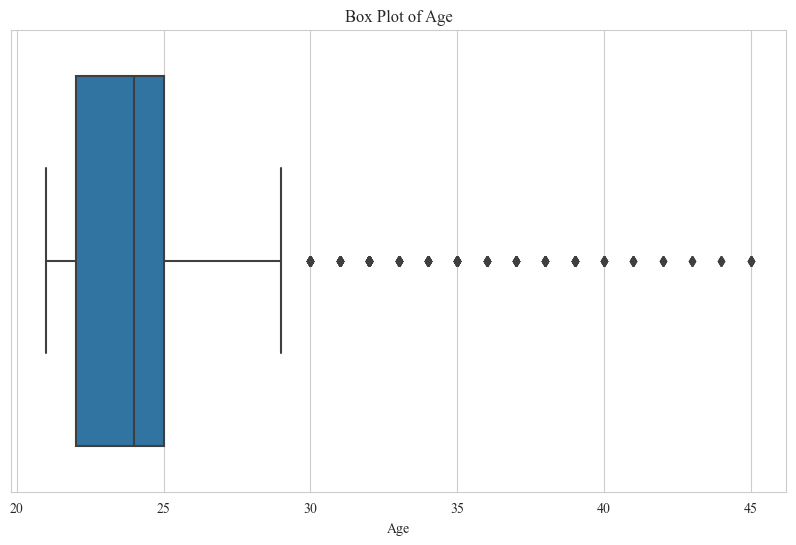

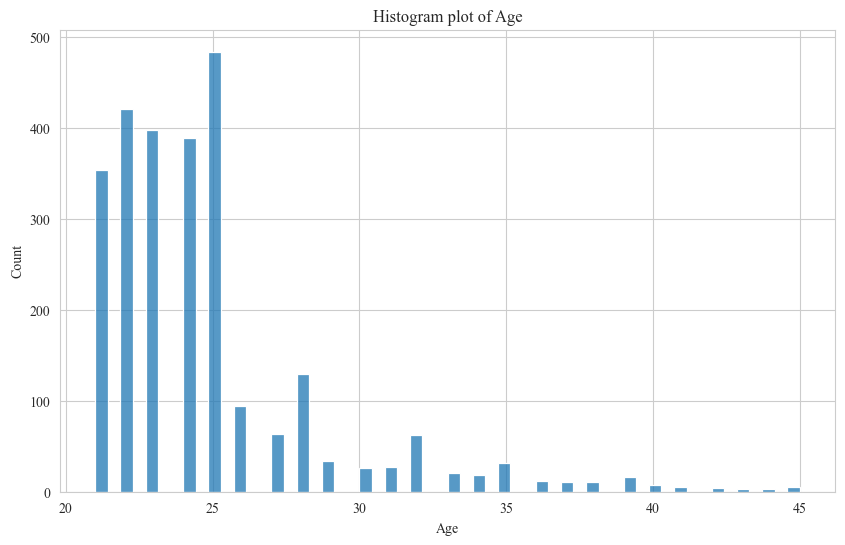

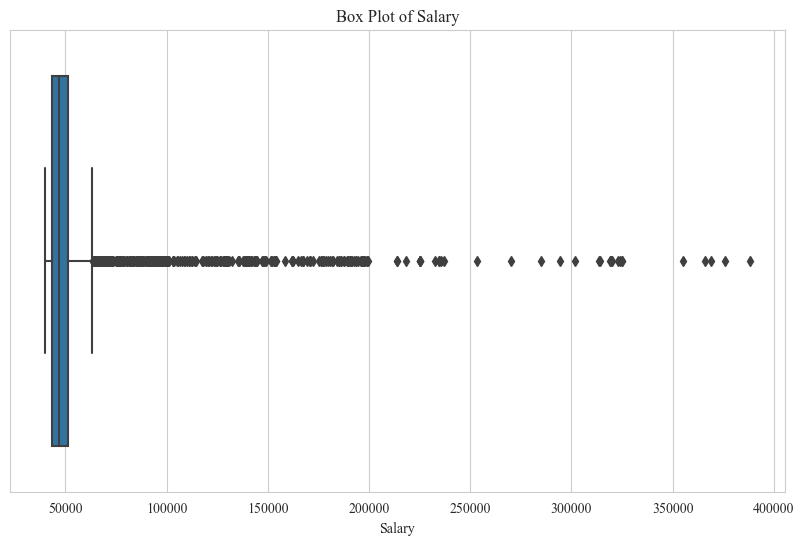

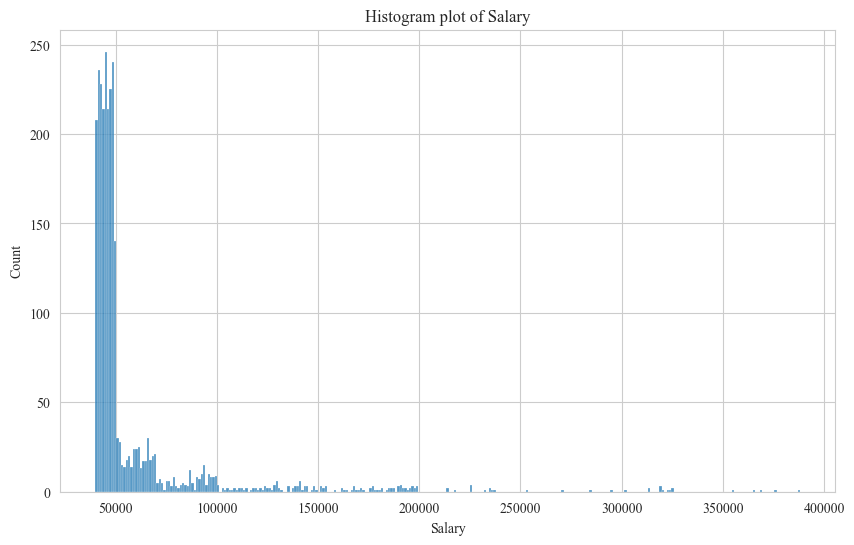

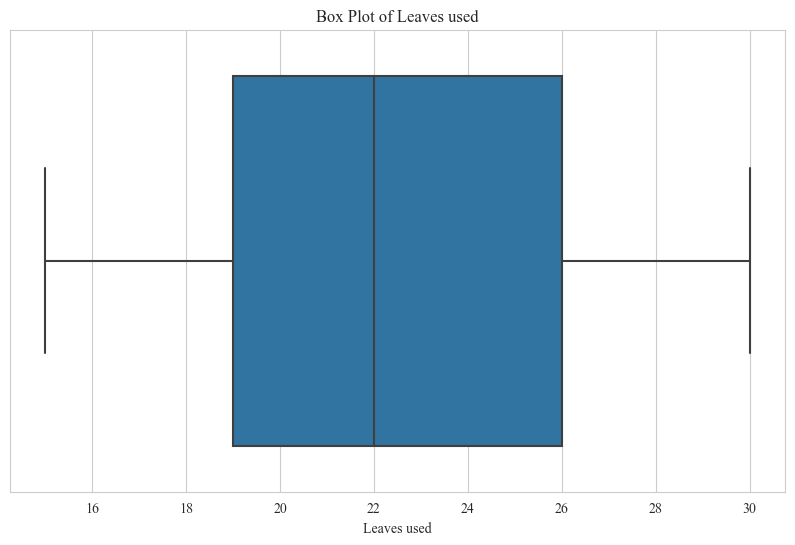

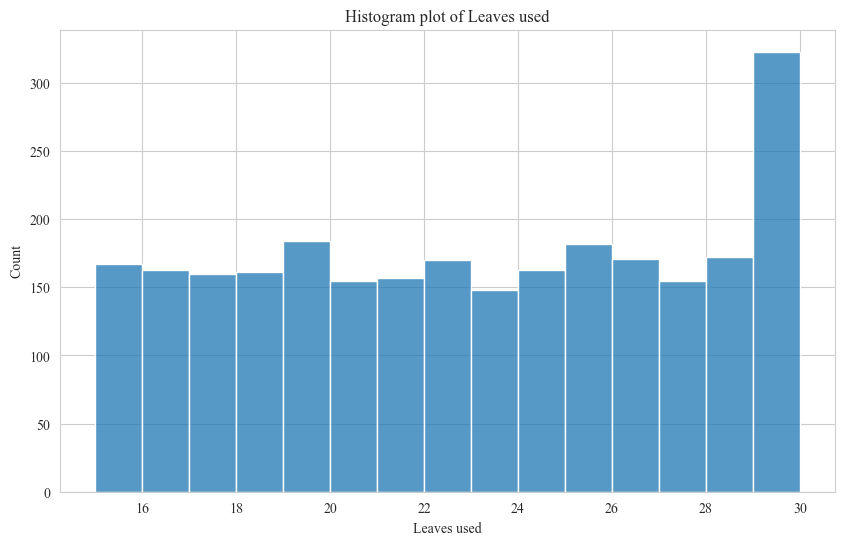

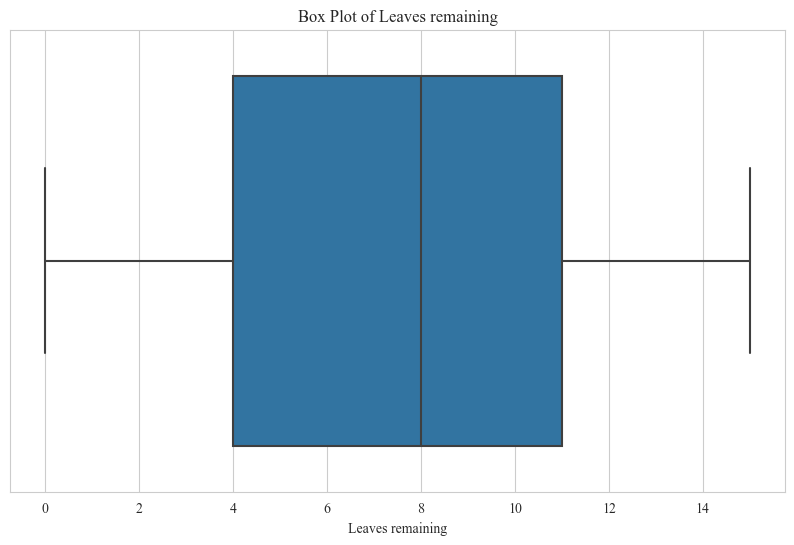

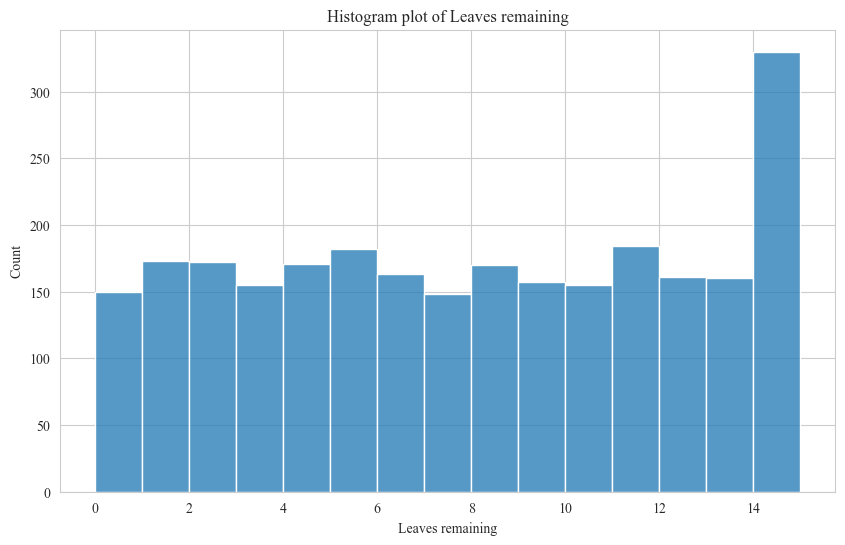

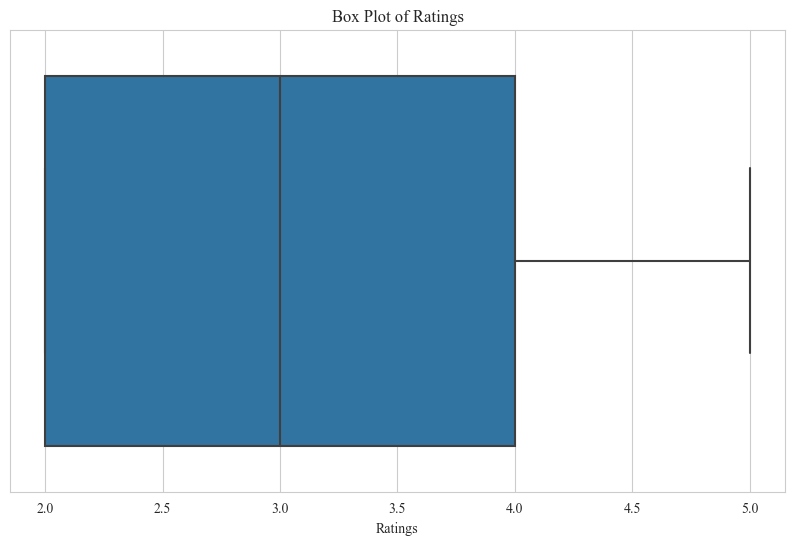

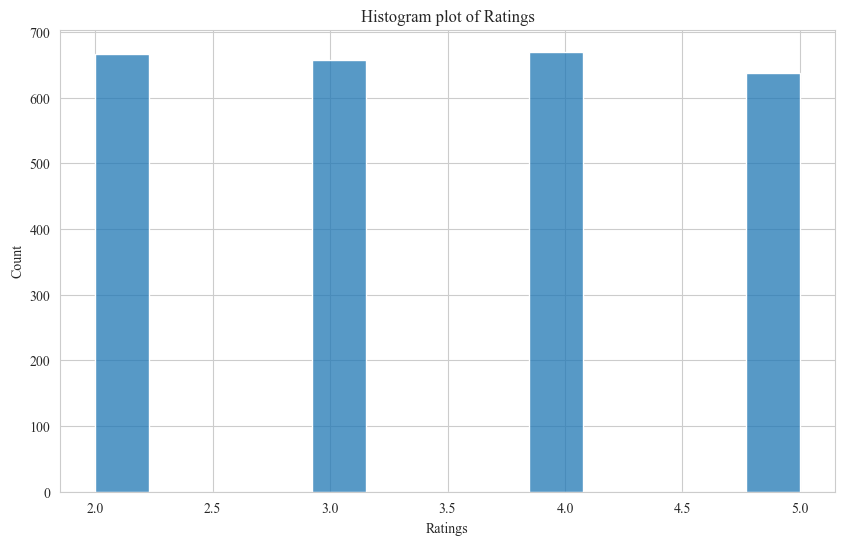

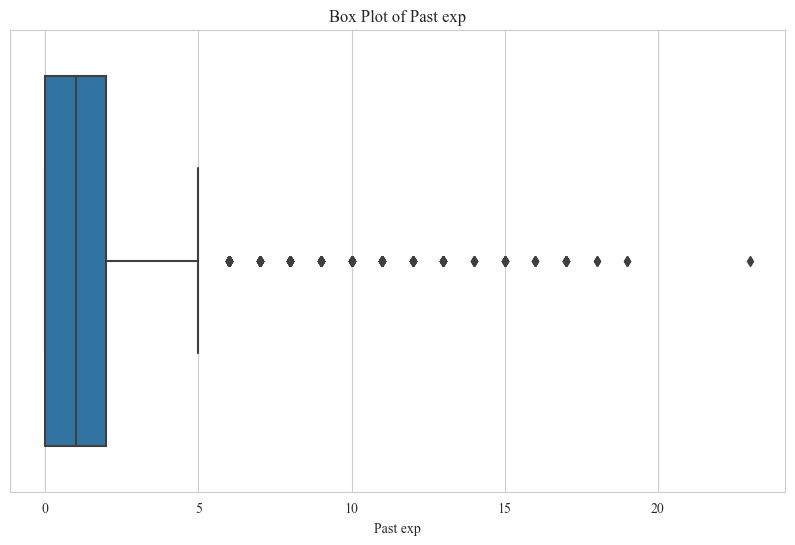

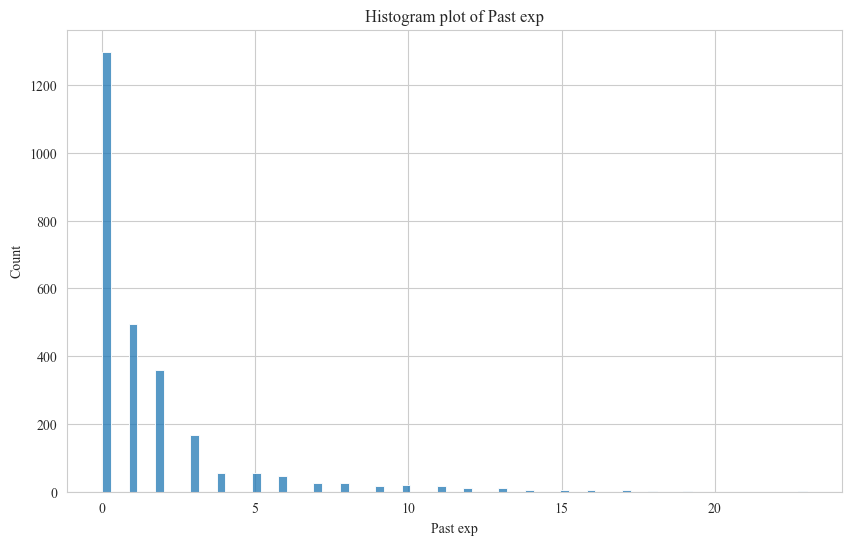

In [74]:
# Create a mask for the dataset's numerical variables
numerical_variables = ["AGE", "SALARY", "LEAVES USED", "LEAVES REMAINING", "RATINGS", "PAST EXP"]

# Check for inconsistencies in the dataset's numerical variables
for x in numerical_variables:
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.boxplot(data = df, x = x).set(xlabel = x.capitalize(), title = f"Box Plot of {x.capitalize()}")
    plt.show()
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.histplot(data = df, x = x).set(xlabel = x.capitalize(), title = f"Histogram plot of {x.capitalize()}")
    plt.show()

There seem to be no abnormal outliers in the dataset's numerical variables. Next, abnormal values will be checked in the dataset's categorical variables. The Python code to accomplish this is given in the code cell below:

In [75]:
# Create a mask for the dataset's categorical variables
categorical_variables = ["FIRST NAME", "LAST NAME", "SEX", "DESIGNATION", "UNIT"]

# Check for inconsistencies in the dataset's categorical variables
for x in categorical_variables:
    if x != "UNIT":
        print(f"""Column: {x}
Unique values: {list(df[x].unique())} \n """)
    else:
        print(f"""Column: {x}
Unique values: {list(df[x].unique())}""")

Column: FIRST NAME
Unique values: ['TOMASA', 'OLIVE', 'CHERRY', 'ELLIOT', 'KATHY', 'LILIAN', 'BELLE', 'WELDON', 'BOYD', 'BART', 'ALONZO', 'ROYCE', 'BURTON', 'ORVILLE', 'KORY', 'NETTIE', 'BRENT', 'HARRIETTE', 'GARLAND', 'OSWALDO', 'SEYMOUR', 'ROXANNE', 'CLAUD', 'MARIANNA', 'FOSTER', 'MAUDIE', 'TORI', 'KELLEY', 'HILLARY', 'MICKEY', 'ROSIE', 'GAVIN', 'ANNABELLE', 'CHRISTINE', 'MELODIE', 'MICHELL', 'ANDREW', 'LUCRETIA', 'JODY', 'GILDA', 'JOSPEH', 'KING', 'KURT', 'LYNNETTE', 'DANIELA', 'CARI', 'ANGELITA', 'ISABELLE', 'NORBERT', 'PAULINE', 'JANETTE', 'CHARLENE', 'HOWARD', 'PAUL', 'CORTEZ', 'AHMAD', 'JONAH', 'DARIN', 'ALONSO', 'RENE', 'RILEY', 'WYATT', 'KIMBERLEE', 'KRISTA', 'MARYJANE', 'SAVANNAH', 'NATALIE', 'MARY', 'KAYLA', 'JULIAN', 'JO', 'KASEY', 'IONA', 'ALBERTA', 'WILMER', 'MELVIN', 'CORA', 'EVERETT', 'DOTTIE', 'CORINE', 'DARIO', 'HILDA', 'ELOISA', 'HEIDI', 'KATELYN', 'WILLIS', 'RUTH', 'JOSEFA', 'OSCAR', 'ROOSEVELT', 'MARVIN', 'MARCELLA', 'KARL', 'WALTER', 'ELIZA', 'YONG', 'ALVA', 'REIN

There seem to be no inconsistencies in the dataset's categorical variables.

### **Data Conversion**
As mentioned, in this step, all of the variables of the dataset are converted to the right data type. The Python code to accomplish this is given in the code cell below. For contrast, the data types before and after the data conversion step are also displayed.

In [76]:
# Display the dataset's data types
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [77]:
# Convert all of the variables of the dataset to the right datatype
df["FIRST NAME"] = df["FIRST NAME"].astype("string")
df["LAST NAME"] = df["LAST NAME"].astype("string")
df["SEX"] = df["SEX"].astype("string")
df["DOJ"] = df["DOJ"].astype("datetime64[ns]")
df["CURRENT DATE"] = df["CURRENT DATE"].astype("datetime64[ns]")
df["DESIGNATION"] = df["DESIGNATION"].astype("string")
df["AGE"] = df["AGE"].astype("int64")
df["SALARY"] = df["SALARY"].astype("float64")
df["UNIT"] = df["UNIT"].astype("string")
df["LEAVES USED"] = df["LEAVES USED"].astype("int64")
df["LEAVES REMAINING"] = df["LEAVES REMAINING"].astype("int64")
df["RATINGS"] = df["RATINGS"].astype("float64")
df["PAST EXP"] = df["PAST EXP"].astype("int64")

# Display the dataset's data types
df.dtypes

FIRST NAME          string[python]
LAST NAME           string[python]
SEX                 string[python]
DOJ                 datetime64[ns]
CURRENT DATE        datetime64[ns]
DESIGNATION         string[python]
AGE                          int64
SALARY                     float64
UNIT                string[python]
LEAVES USED                  int64
LEAVES REMAINING             int64
RATINGS                    float64
PAST EXP                     int64
dtype: object

### **Numerical Variable Exploration**
As mentioned, in this step, the general distributions of, as well as the relationships between, different numerical variables, are explored. The Python code used to accomplish this is given in the code cell below:

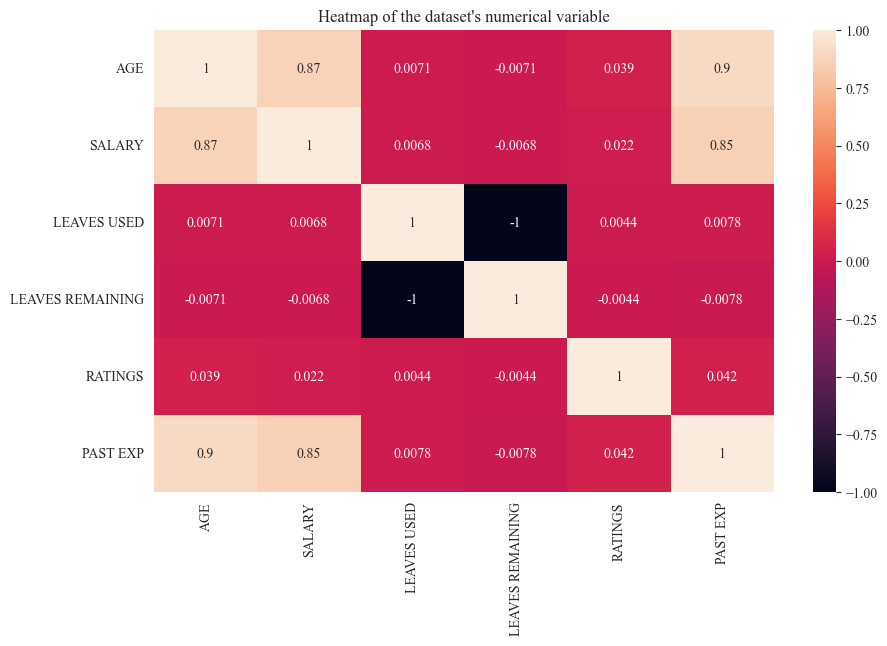

In [78]:
# Generate a subset of the dataset containing only numerical variables
df_numerical_variables = df[numerical_variables]

# Create a correlation matrix between all numerical variables of the dataset
correlation_matrix = df_numerical_variables.corr()

# Display a heatmap of the dataset's correlation matrix between its numerical variables
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.heatmap(data = correlation_matrix, annot = True).set(title = "Heatmap of the dataset's numerical variable")
plt.show()

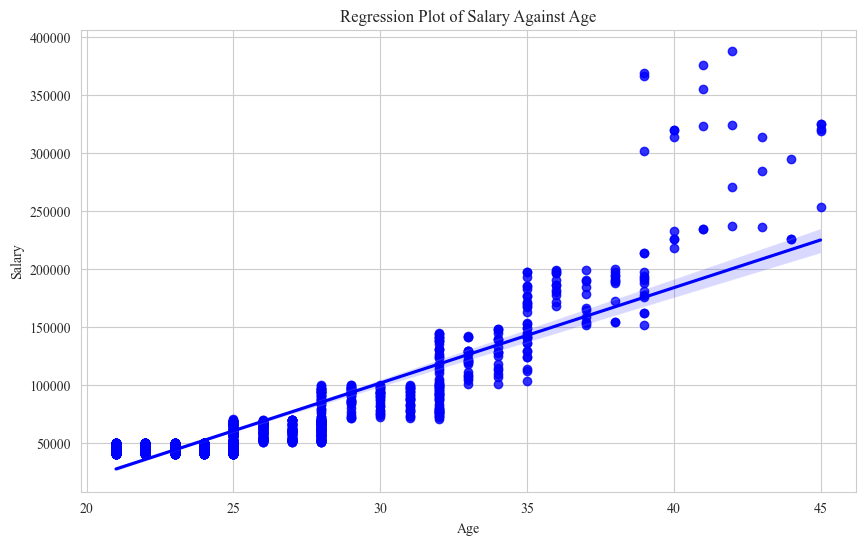

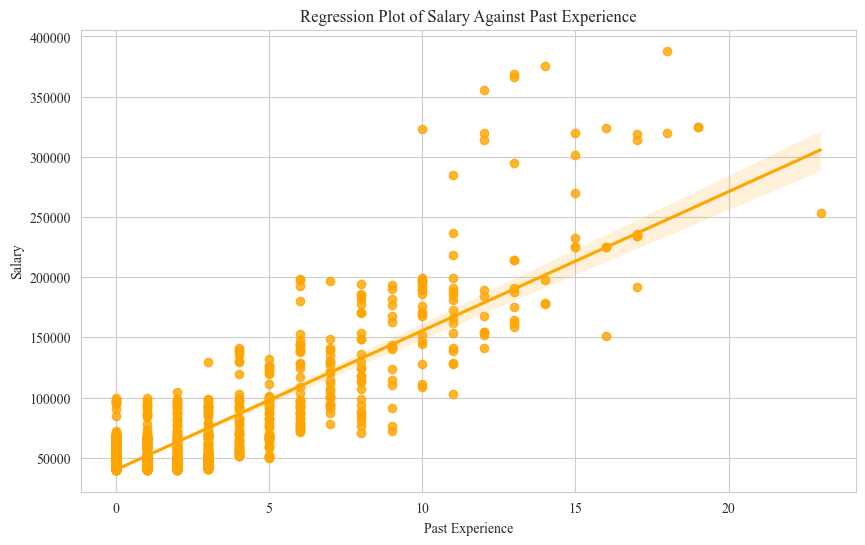

In [79]:
# Create linear regression plots of SALARY against AGE and PAST EXP, respectively, to further examine the strong linear relationship within these pairs of variables
for x, c in zip(["AGE", "PAST EXP"], ["blue", "orange"]): 
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    y = x.capitalize().replace("Past exp", "Past Experience")
    sns.regplot(data = df, x = x, y = "SALARY", color = c).set(xlabel = x.capitalize().replace("Past exp", "Past Experience"), ylabel = "Salary", title = f"Regression Plot of Salary Against {y}")
    plt.show()

### **Categorical Variable Exploration**
Next the above exploration of the dataset's numerical variables will be repeated, but this time controlling for specific values of the dataset's categorical variables (e.g. the `SEX`, `UNIT` and `DESTINATION` columns of the dataset), so as to determine if any categorical variables have a significant relationship with the numerical variables examined previously. The Python code used to accomplish all of this is given in the code cell below.


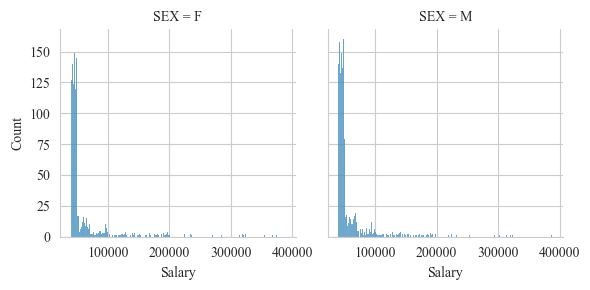

In [80]:
sex_grid = sns.FacetGrid(df, col = "SEX")
sex_grid.map(sns.histplot, "SALARY").set(xlabel = "Salary")
plt.show()

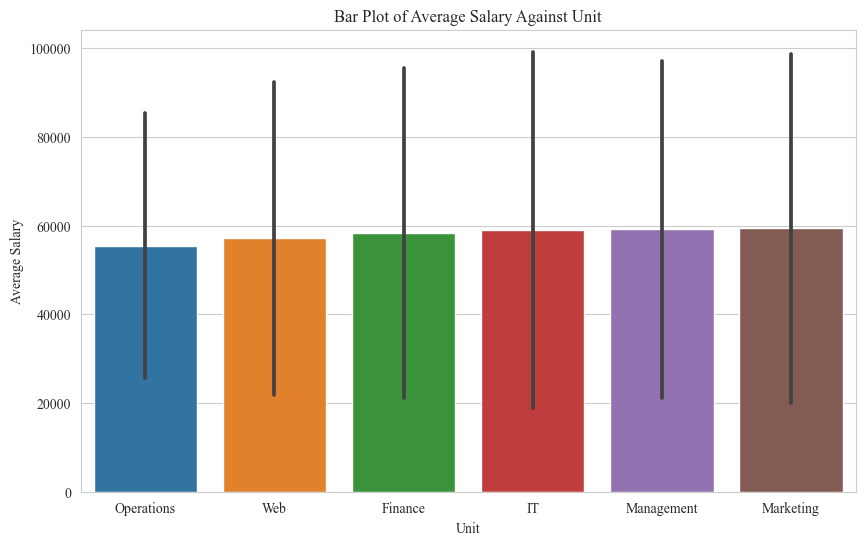

In [81]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.barplot(data = df, x = "UNIT", y = "SALARY", errorbar = "sd", estimator = "mean", order = df.groupby(['UNIT'])['SALARY'].mean().reset_index().sort_values('SALARY')['UNIT']).set(xlabel = "Unit", ylabel = "Average Salary", title = "Bar Plot of Average Salary Against Unit")
plt.show()

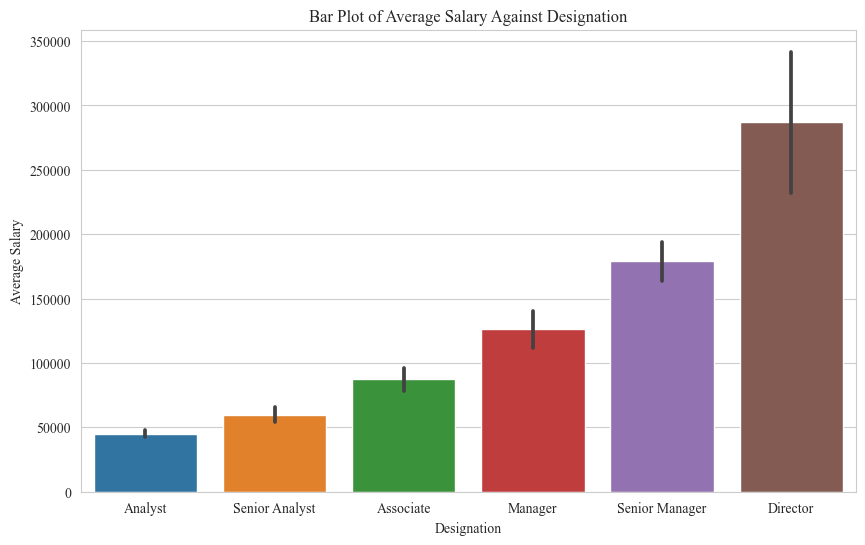

In [82]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.barplot(data = df, x = "DESIGNATION", y = "SALARY", errorbar = "sd", estimator = "mean", order = df.groupby(['DESIGNATION'])['SALARY'].mean().reset_index().sort_values('SALARY')['DESIGNATION']).set(xlabel = "Designation", ylabel = "Average Salary", title = "Bar Plot of Average Salary Against Designation")
plt.show()

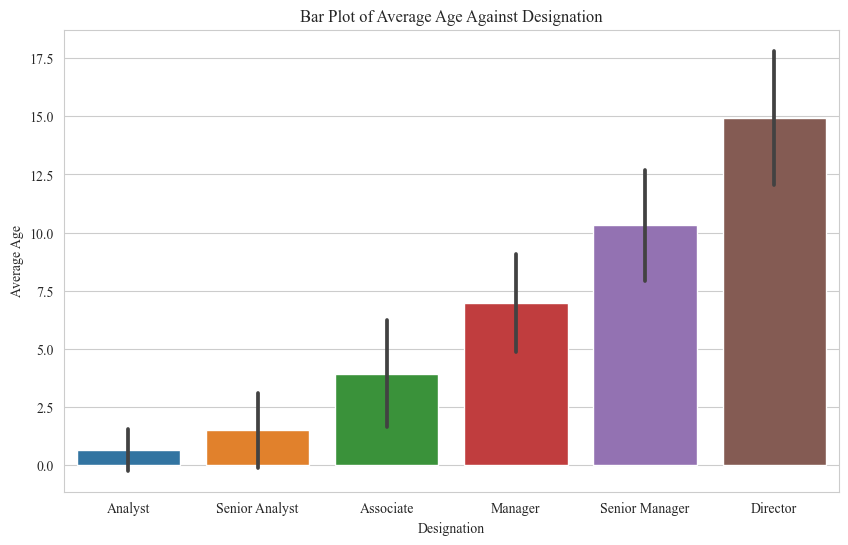

In [83]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.barplot(data = df, estimator = "mean", errorbar = "sd", x = "DESIGNATION", y = "PAST EXP", order = df.groupby(['DESIGNATION'])['AGE'].mean().reset_index().sort_values('AGE')['DESIGNATION']).set(xlabel = "Designation", ylabel = "Average Age", title = "Bar Plot of Average Age Against Designation")
plt.show()

Based on all of the previous plots, it appears that the salaries of data professionals do not vary much by gender. But they do seem to vary a lot more according to the unit and designation in question (especially the latter). Finally, the following plot shows how the data professionals' salaries vary by the date they joined the company.

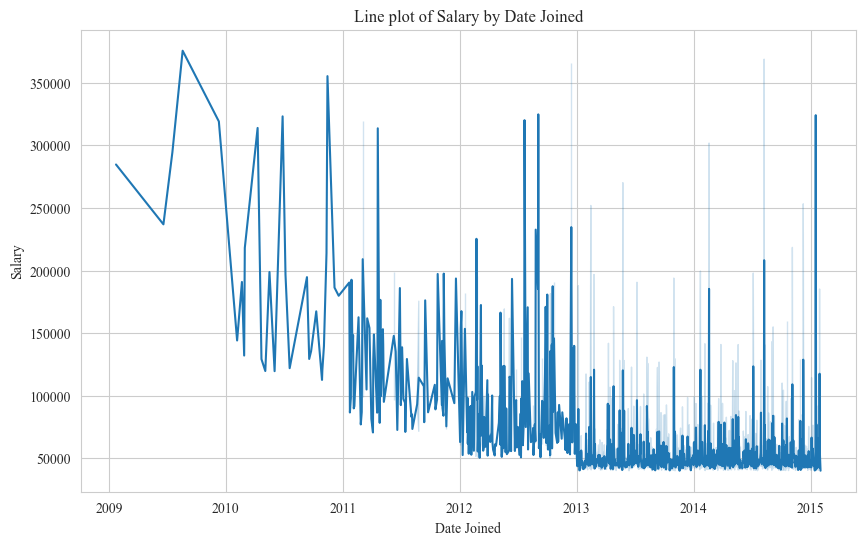

In [84]:
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.lineplot(data = df, x = "DOJ", y = "SALARY").set(xlabel = "Date Joined", ylabel = "Salary", title = "Line plot of Salary by Date Joined")
plt.show()

From the above plot, it seems as though there is a rather strong relationship between the date at which a data professional has joined the company and their salary. This is because newer employees tend to have significantly lower salaries than their more experience counterparts, which is to be expected, because of what was uncovered with the `PAST EXP` column of the dataset.

### **Summary**
After having imported and cleaned the dataset, the dataset then saw its variables converted to the right data types. Moreover, the numerical and categorical variables of the dataset were explored so as to determine any salient relationships. Ultimately, the following important relationships were found:
* The salaries of the data professionals have a very strong linear relationship between their ages and years of past experience;
* The salaries of the data professionals do not seem to have a very strong linear relationship with the rest of the dataset's numerical variables;
* The salaries of the data professionals do not seem to have any strong relationship with their genders;
* The salaries of the data professionals have a moderate relationship with the unit in which they work, and have an even stronger relationship with their designations (i.e. seniority), and;
* The average ages of the data professionals have a very strong relationship with their designations.
* The data professionals' salaries were strongly related to the date at which they joined the company, which, in turn, is strongly related to their numbers of years of past experience.

## **Feature Engineering**
The Feature Engineering step is, in this project, reduced purely to the Feature Selection step. The reasons for this are as follows:
* In the Exploratory Data Analysis step, it was found that many variables, numerical and categorical, have a strong pairwise relationship with one another.
* That several of the dataset's numerical variables have a strong linear relationship with one another implies that some of the variables should be removed from the model's implementation.
* That some of the dataset's variables should be removed from the model's implementation implies that there is little to no necessity to create new ones. Hence, no new variables shall be created.
* Any categorical variables, if selected, will be transformed via one-hot encoding. This process is, strictly speaking, part of the Data Preprocessing step, and so will be omitted, here.

The Feature Selection step is undertaken as follows:
* The `FIRST NAME` and `LAST NAME` column seem to have no strong relationship with the `SALARY` column. Thus, both will be omitted from the development of the predictive model.
* The `AGE` and `PAST EXP` columns of the dataset have a very high correlation (`0.9`). Hence, only one of the will be incorporated in the predictive model. Given that a data's professional standing in their industry is more closely related to their number of years of experience than their age, the `AGE` column will be removed and the `PAST EXP` variable will be retained.
* The `UNIT` column of the dataset, it was discussed, does not seem to have a strong relationship with the `SALARY` column. Hence, it will also be removed from the predictive model.
* The `DOJ` column will also be ommitted from the development of the predictive model, because it is directly related to the `PAST EXP` column.

Therefore, all of and only the following columns of the dataset shall be selected in the implementation of the predictive model:
* `DESIGNATION`: A predictor categorical variable;
* `PAST EXP`: A predictor numerical variable, and;
* `SALARY`: The target numerical variable.

## **Data Preprocessing**
Having selected the variables of interest, the dataset will now be preprocessed so as to prepare it for the implementation of our predictive model. More specifically, the `DESIGNATION` column will be transformed via one-hot encoding, the `PAST EXP` and `SALARY` columns will be standardised. This is done to ensure that all of the data is is numerical format, and that variables with larger values are not overrepresented and that variables with smaller values are not underrepresented in the model. The Python code to accomplish this is given in the code cell below:

In [99]:
# Select only the relevant features of the dataset
df_preprocessed = df[["DESIGNATION", "PAST EXP", "SALARY"]]

# One-hot encode the categorical variable
df_preprocessed = pd.get_dummies(data = df_preprocessed, columns = ["DESIGNATION"]).astype("float64").iloc[:,[2,3,4,5,6,7,0,1]]

# Scale the numerical variables
df_preprocessed[["PAST EXP", "SALARY"]] = StandardScaler().fit_transform(X = df_preprocessed[["PAST EXP", "SALARY"]])

# Display the first few rows of the resulting preprocessed dataset
df_preprocessed.head()

,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,PAST EXP,SALARY
0,1.0,0.0,0.0,0.0,0.0,0.0,-0.573447,-0.367536
2,1.0,0.0,0.0,0.0,0.0,0.0,-0.573447,-0.465608
3,1.0,0.0,0.0,0.0,0.0,0.0,-0.573447,-0.340949
6,1.0,0.0,0.0,0.0,0.0,0.0,-0.573447,-0.482319
8,0.0,0.0,0.0,0.0,1.0,0.0,-0.206536,0.145422


In [104]:
# Split the dataset into a training set and a test set
X_train, y_train, X_test, y_test = train_test_split(df_preprocessed, random_state = 42, test_size = 0.2)

ValueError: not enough values to unpack (expected 4, got 2)

## **Machine Learning Model Development**
Our predictive model will be selected from a range of different regression models, which will include:
* Ordinary Least Squares Linear Regression
* Ridge Linear Regression
* Lasso Linear Regression

In [ ]:
# Split the dataset into a training set and a test set
X_train, y_train, X_test, y_test = 

## **Model Evaluation**
## **Machine Learning Pipelines and Model Deployment**
## **Recommendation**
## **Conclusion**